# Tutorial using Jupyter notebooks

The `sapphireppplot` library can also be used to interactively work in Jupyter notebooks.
This tutorial demonstrates this using the Sapphire++ 
[Quick-start example](https://sapphirepp.org/latest/quick-start.html).

We will produce similar plots to the Quick-start script,
but focus on the use of NumPy and Matplotlib.

## Preamble

To run the notebook, the `sapplot` conda environment has to be used
in order to import `sapphireppplot` alongside NumPy and Matplotlib.
We use `autoreload` to automatically reload updates to external scripts
or the `sapphireppplot` library.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
from sapphireppplot import vfp, numpyify, utils

## Loading Results

Next, we define the `PlotProperties` and load the results.
Inside notebooks, we cannot use the automatic determination of command line arguments 
or user input prompting.
Instead, we directly give the path to the `results_folder`.

In [2]:
plot_properties = vfp.PlotPropertiesVFP(
    dimension=2,
    momentum=True,
    color_bar_position=[0.15, 0.55],
)

results_folder, prm, solution, animation_scene = vfp.load_solution(
    plot_properties,
    results_folder="$SAPPHIREPP_RESULTS/quick-start/01",
)

Using results in '/Users/flo/Documents/PhD/Code/sapphirepp-results/quick-start/01'
Read file '/Users/flo/Documents/PhD/Code/sapphirepp-results/quick-start/01/log.prm'
Load results in '/Users/flo/Documents/PhD/Code/sapphirepp-results/quick-start/01/solution*.pvtu'


In contrast to the quick-start example,
we do not want to save the resulting figures in the results folder.
Instead, we use a separate folder for figures.

In [3]:
figures_folder = "figures"

## Plotting a 2D Render View

As the first plot, we show the 2D view of the data.
For this, we use ParaView through the `sapphireppplot` interface.
The figure will be saved as a PNG in the `figures_folder`,
but we can use the IPython display functionality to show it in the notebook.

Save screenshot 'figures/jupyter-tutorial-2D.png


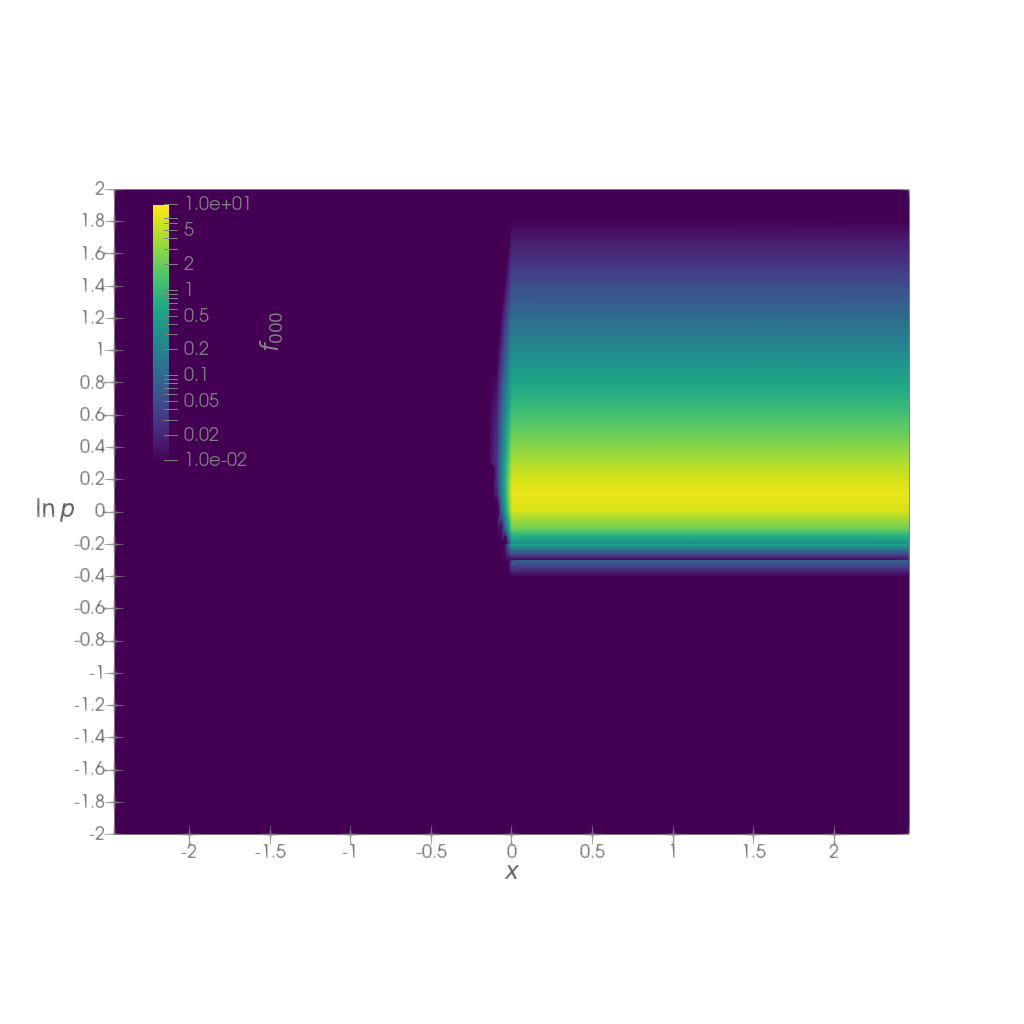

In [4]:
layout_2d, render_view_2d = vfp.plot_f_lms_2d(
    solution,
    figures_folder,
    "jupyter-tutorial-2D",
    plot_properties,
    lms_index=[0, 0, 0],
    value_range=[1e-2, 10.0],
)

display(Image(filename=f"{figures_folder}/jupyter-tutorial-2D.png"))

## Extract to NumPy array

We now extract the data to 2D NumPy arrays using the `to_numpy_2d` function.
This function converts the DG data into cell-centered values 
before extracting the NumPy arrays.
This simplifies the array handling,
as we do not need to worry about left-/right-hand values at faces.

In [5]:
points, data = numpyify.to_numpy_2d(solution, array_names=["f_000", "f_100"])

The `points` array is a 3D NumPy array with the `[x, y, z]` values in a mesh grid,
with `x` as the first and `y`/`ln_p` as the second index.
To extract their 1D axes, we use:

In [6]:
x = points[:, 0, 0]
ln_p = points[0, :, 1]

The `data` array is a 3D NumPy array
where the first index accesses the different extracted `array_names`,
and the second and third indices are the mesh grid. 
Since we only extracted `f_000` and `f_100`, 
we can define them as:

In [7]:
f_000 = data[0]
f_100 = data[1]

## Plotting $f(x)$

We now want to plot the spatial distribution at $\ln p = 0.05$
using the NumPy arrays and Matplotlib.

To do this, we first need to extract the closest index to `ln_p = 0.05`.
The `utils` submodule provides a convenience function for this:

In [8]:
idx_p = utils.find_closest_index(ln_p, 0.05, print_index=True)

20 is closest index to 0.05: array[20] = 0.05000000074505828


We use Matplotlib to show $f_{000}(x)$ and $f_{100}(x)$.
The figure is saved as a vector graphic in PDF format.

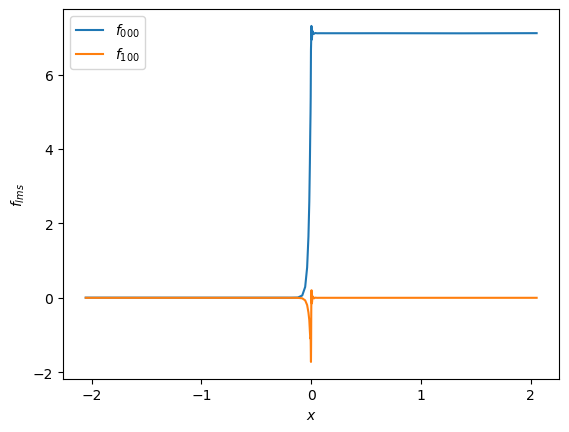

In [9]:
fig, ax = plt.subplots()

ax.plot(x, f_000[:, idx_p], label=r"$f_{000}$")
ax.plot(x, f_100[:, idx_p], label=r"$f_{100}$")

ax.set_ylabel(r"$f_{lms}$")
ax.set_xlabel(r"$x$")
ax.legend()

fig.savefig(f"{figures_folder}/jupyter-tutorial-f-x.pdf")

## Plotting $p^4 f(p)$

Finally, we plot the spectrum scaled with $p^4$ at the shock ($x = 0$).

19 is closest index to 0.0: array[19] = -0.0006249999860297173


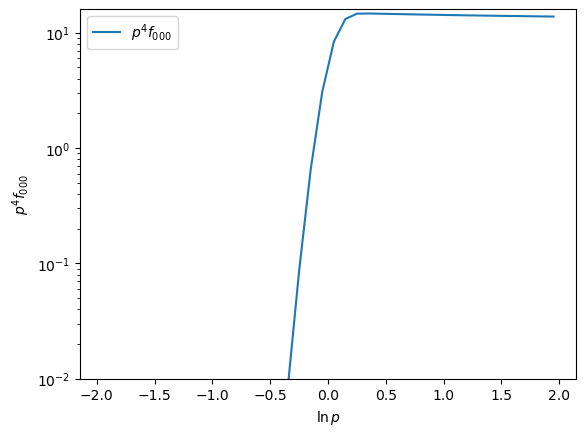

In [10]:
idx_x = utils.find_closest_index(x, 0.0, print_index=True)

fig, ax = plt.subplots()

ax.plot(ln_p, np.exp(4 * ln_p) * f_000[idx_x, :], label=r"$p^4 f_{000}$")

ax.set_ylim(1e-2, 16.0)
ax.set_yscale("log")
ax.set_ylabel(r"$p^4 f_{000}$")
ax.set_xlabel(r"$\ln p$")
ax.legend()

fig.savefig(f"{figures_folder}/jupyter-tutorial-f-p.pdf")